### 데이터 로드 및 전처리

- CIFAR10 데이터셋을 로드하고, `훈련 데이터셋에서 20%를 검증 데이터셋`으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 `sklearn 라이브러리의 train_test_split 함수를 활용`합니다.
- `훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력`합니다.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.datasets import cifar10

In [ ]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
print(x_train_full.shape, y_train_full.shape)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  random_state=5, test_size=.2)
print()
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

(50000, 32, 32, 3) (50000, 1)

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [ ]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

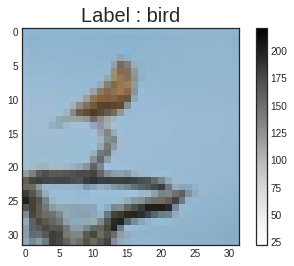

In [ ]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.title(f'Label : {class_names[y_train[0].item()]}', fontsize = 20 )
plt.colorbar()
plt.show()


In [ ]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
import numpy as np

x_train = np.reshape(x_train, (-1,3072))
x_val = np.reshape(x_val, (-1,3072))
x_test = np.reshape(x_test, (-1,3072))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [ ]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [ ]:
def one_hot_encoding(data, dim=10):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

y_tr = one_hot_encoding(y_train)
y_tt = one_hot_encoding(y_test)
y_v = one_hot_encoding(y_val)

print(y_train[0])
print(y_tr[0])
print(class_names)

[2]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### 모델 구성 및 컴파일

In [ ]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

model = models.Sequential()
# model.add(layers.Dense(512, input_shape=(3072,), name='input'))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, input_shape=(3072,), name='input'))
# model.add(layers.Dense(128, input_shape=(3072,), name='hidden_1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, name='hidden_2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax', name='output'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               393344    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                2064      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0

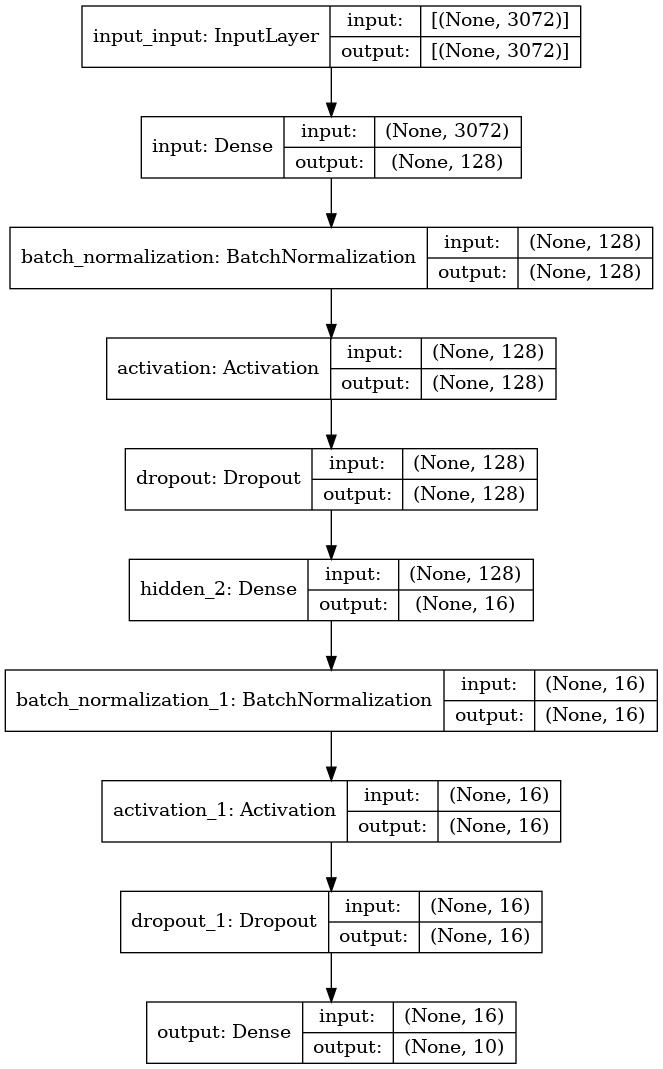

In [ ]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

### loss : categorical_crossentropy

In [ ]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(np.array(x_train), np.array(y_tr), epochs=100, batch_size = 16,
                    callbacks=[check_point_cb,early_stopping_cb],
                    validation_data=(np.array(x_val), np.array(y_v)))

Epoch 1/100
2500/2500 [==============================] - 9s 3ms/step - loss: 1.9229 - accuracy: 0.3045 - val_loss: 1.7591 - val_accuracy: 0.3733
Epoch 2/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.7797 - accuracy: 0.3574 - val_loss: 1.6719 - val_accuracy: 0.4090
Epoch 3/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.7272 - accuracy: 0.3740 - val_loss: 1.6493 - val_accuracy: 0.4077
Epoch 4/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6843 - accuracy: 0.3943 - val_loss: 1.6524 - val_accuracy: 0.4075
Epoch 5/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6518 - accuracy: 0.4079 - val_loss: 1.5821 - val_accuracy: 0.4337
Epoch 6/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6339 - accuracy: 0.4142 - val_loss: 1.5235 - val_accuracy: 0.4677
Epoch 7/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6166 - accuracy: 0.4198 - val_loss: 1.5001 - val_ac

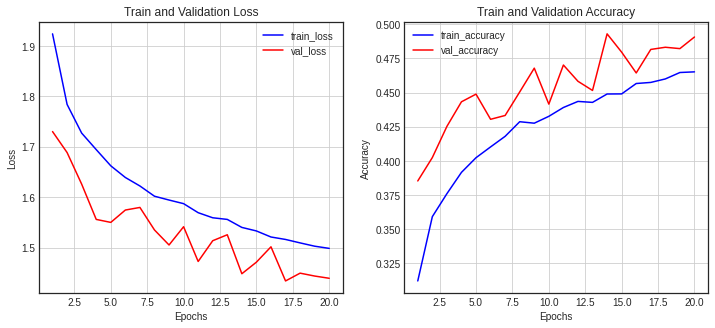

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.

loss, accuracy = model.evaluate(x_test, y_tt)
print('TESTSET Loss :',loss)
print('TESTSET Accuracy :',accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.4264 - accuracy: 0.4912
TESTSET Loss : 1.4263691902160645
TESTSET Accuracy : 0.4912000000476837


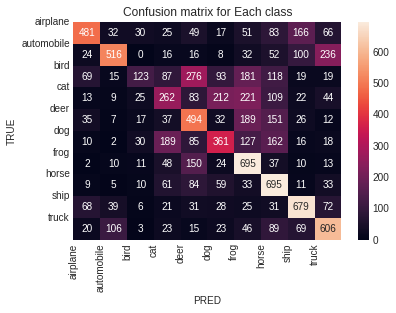

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

prob = model.predict(x_test)
pred = np.argmax(prob, axis =-1)
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=  True, fmt ='d')
plt.ylabel('TRUE')
plt.xlabel('PRED')
plt.yticks(range(10),
           labels = [class_names[x] for x in range(10)],
           rotation = 0)
plt.xticks(range(10),
           labels = [class_names[x] for x in range(10)],
           rotation = 90)
plt.title('Confusion matrix for Each class')
plt.show()

### loss : sparse_categorical_crossentropy

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size = 512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
79/79 [==============================] - 2s 12ms/step - loss: 1.6577 - accuracy: 0.4085 - val_loss: 1.6952 - val_accuracy: 0.4090
Epoch 2/100
79/79 [==============================] - 1s 6ms/step - loss: 1.6125 - accuracy: 0.4223 - val_loss: 1.6463 - val_accuracy: 0.4256
Epoch 3/100
79/79 [==============================] - 1s 7ms/step - loss: 1.5751 - accuracy: 0.4374 - val_loss: 1.6195 - val_accuracy: 0.4366
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 1.5524 - accuracy: 0.4434 - val_loss: 1.7146 - val_accuracy: 0.3914
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 1.5279 - accuracy: 0.4503 - val_loss: 1.6073 - val_accuracy: 0.4223
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 1.5018 - accuracy: 0.4614 - val_loss: 1.5789 - val_accuracy: 0.4358
Epoch 7/100
79/79 [==============================] - 1s 6ms/step - loss: 1.4806 - accuracy: 0.4666 - val_loss: 1.6132 - val_accuracy: 0.4269
Epoch 8/100


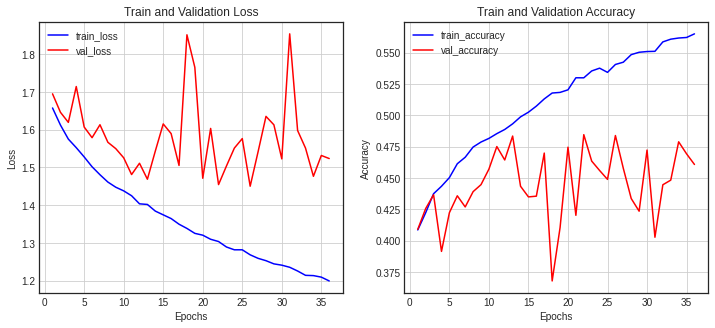

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.

loss, accuracy = model.evaluate(x_test, y_test)
print('TESTSET Loss :',loss)
print('TESTSET Accuracy :',accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.4395 - accuracy: 0.4875
TESTSET Loss : 1.4394574165344238
TESTSET Accuracy : 0.48750001192092896


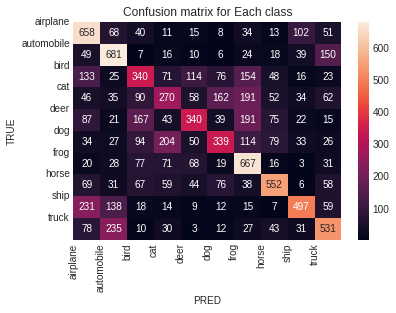

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

prob = model.predict(x_test)
pred = np.argmax(prob, axis =-1)
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=  True, fmt ='d')
plt.ylabel('TRUE')
plt.xlabel('PRED')
plt.yticks(range(10),
           labels = [class_names[x] for x in range(10)],
           rotation = 0)
plt.xticks(range(10),
           labels = [class_names[x] for x in range(10)],
           rotation = 90)
plt.title('Confusion matrix for Each class')
plt.show()

### 회고

**Problem** : softmax로 10개가 나오는데 이게 y_test 1개의 값이랑 shape가 맞지 않아서 에러가 생겨 one-hot encoding 과정을 거처 진행했다.

**Solution** : loss를 sparse_categorical_crossentropy를 사용하면 해결되는 문제였다.
다중 클래스 분류에서 타겟이 하나의 값일때 사용하며 one-hot encoding을 하지 않아도 되서 메모리 소요가 적어진다는 장점을 가진다.

fashionMNIST 노드에서 같은 스토리로 진행되었었는데 그 부분을 잘 읽지 않아서 괜한 노동을 했었다.
이 기회에 제대로 알게 되어 다행인 듯🤦‍♂️
